# **Name: Chidiebere Sam-Ogbonna**
## **Project: Visual Insights on Automobile Sales Analysis**
**Introduction**: 

This project focuses on analyzing historical automobile sales data to uncover insights and trends. The analysis involves data cleaning, data visualization, and geographical plotting using various Python libraries.


In [1]:
%pip install seaborn
%pip install folium

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [2]:
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.isnull().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [6]:
# Summary statistics
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


**Data Cleaning**


I performed data cleaning tasks to handle missing values and ensure the dataset is ready for analysis

In [7]:
# Filling in missing values with appropriate methods
df.fillna(method='ffill', inplace=True)
# Drop any remaining rows with missing values
df.dropna(inplace=True)

**Data Visualization**

I started creating visualizations to identify trends and patterns in the data

**1.** The first figure is a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year.

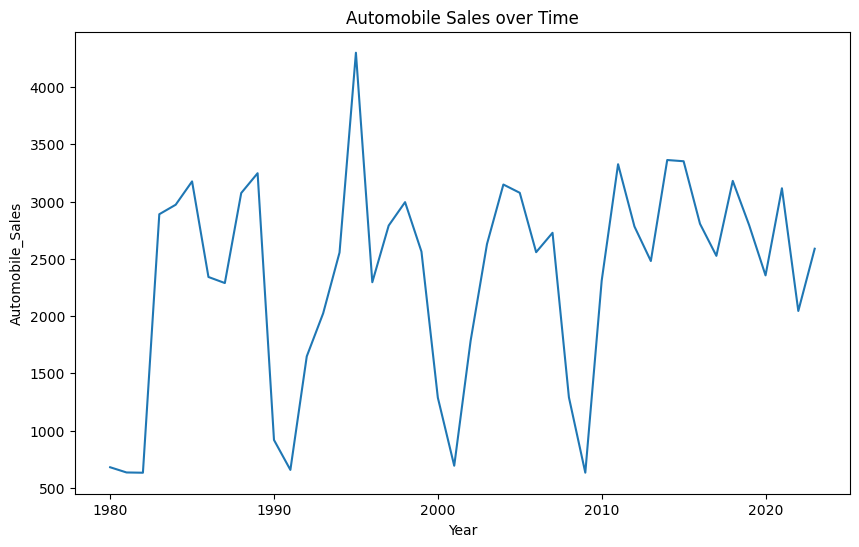

In [8]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales over Time')
plt.show()

**2.** The second figure is a *bar chart* showing the Total Automobile Sales by Vehicle Type.

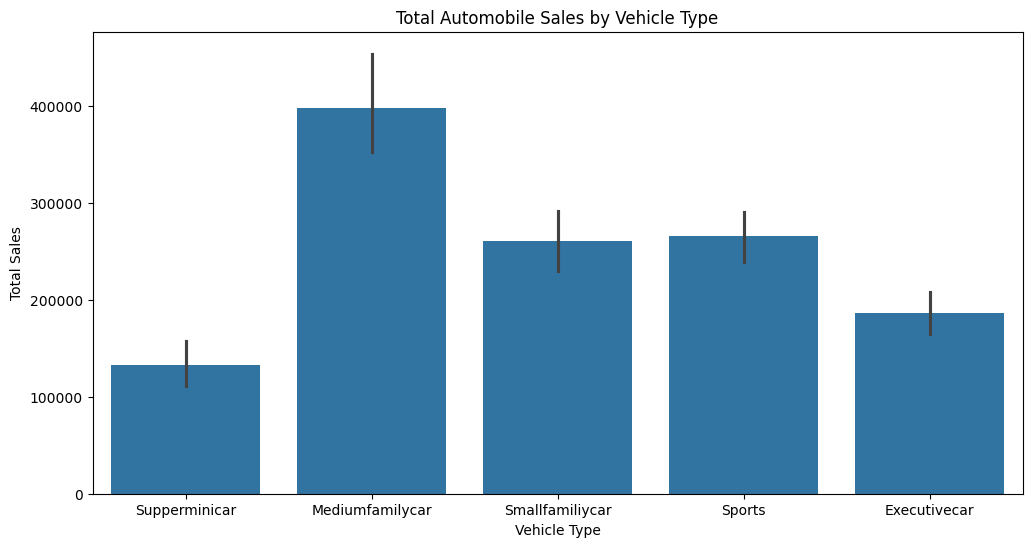

In [9]:
# Plotting sales by vehicle type
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Vehicle_Type', y='Automobile_Sales', estimator=sum)
plt.title('Total Automobile Sales by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.show()

**3.** The third figure is a plot of different lines for categories of vehicle type. The analysis of this trend will answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?"

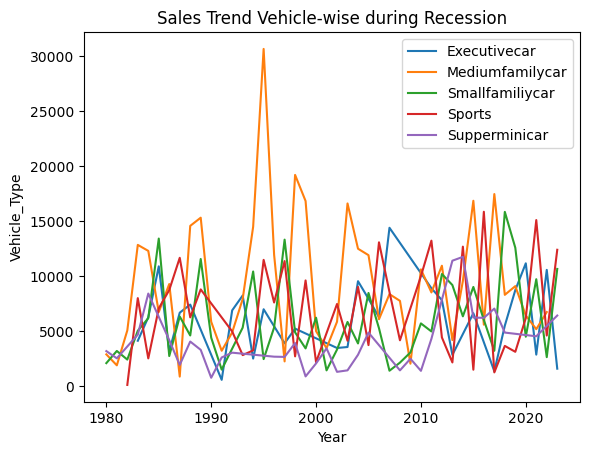

In [10]:
    df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('Year')
    plt.ylabel('Vehicle_Type')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

**4.** In the fourth figure, I used the functionality of *Seaborn Library* to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


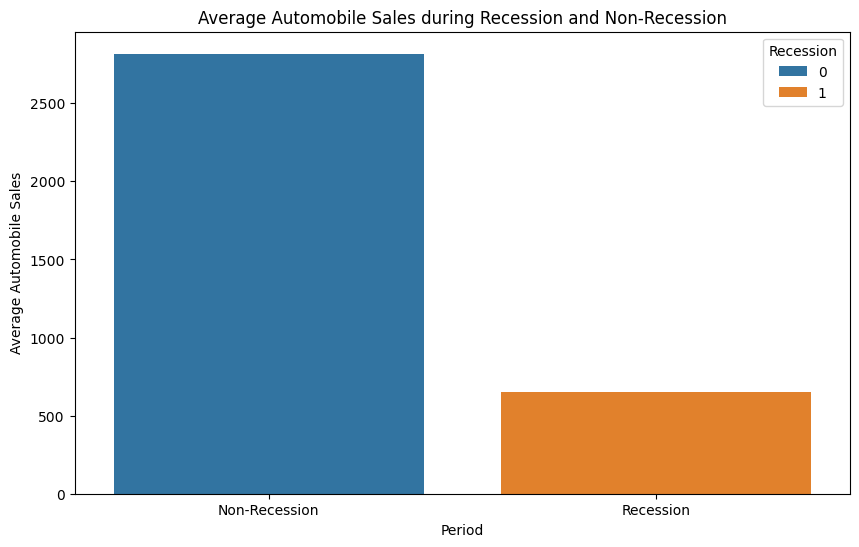

In [11]:
# Grouping by 'Recession' and calculating the mean of 'Automobile_Sales'
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Creating the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

**5.** In the fifth figure, I compared the sales of different vehicle types during a recession and a non-recession period.

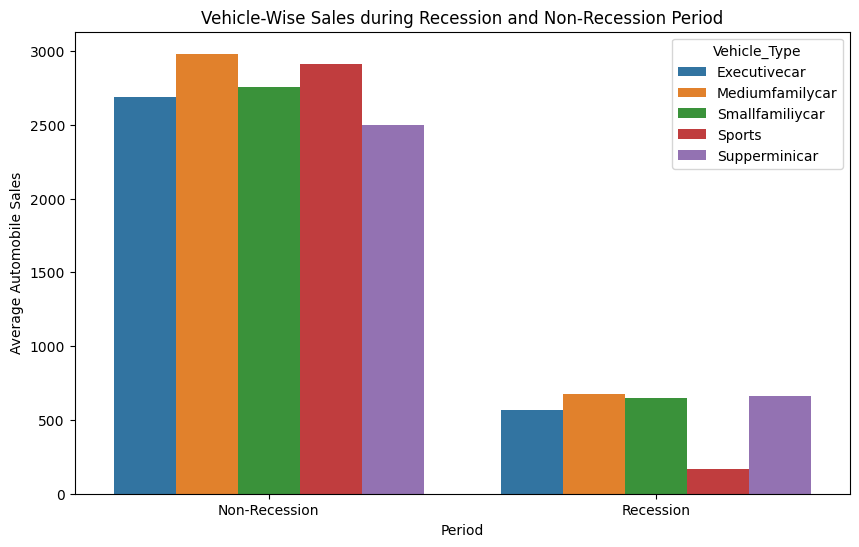

In [12]:
# Filtering the data for recessionary periods
recession_data = df[df['Recession'] == 1]

# Grouping by 'Recession' and 'Vehicle_Type' and calculating the mean of 'Automobile_Sales'
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Creating the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()


**6.** In the sixth figure, I used sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

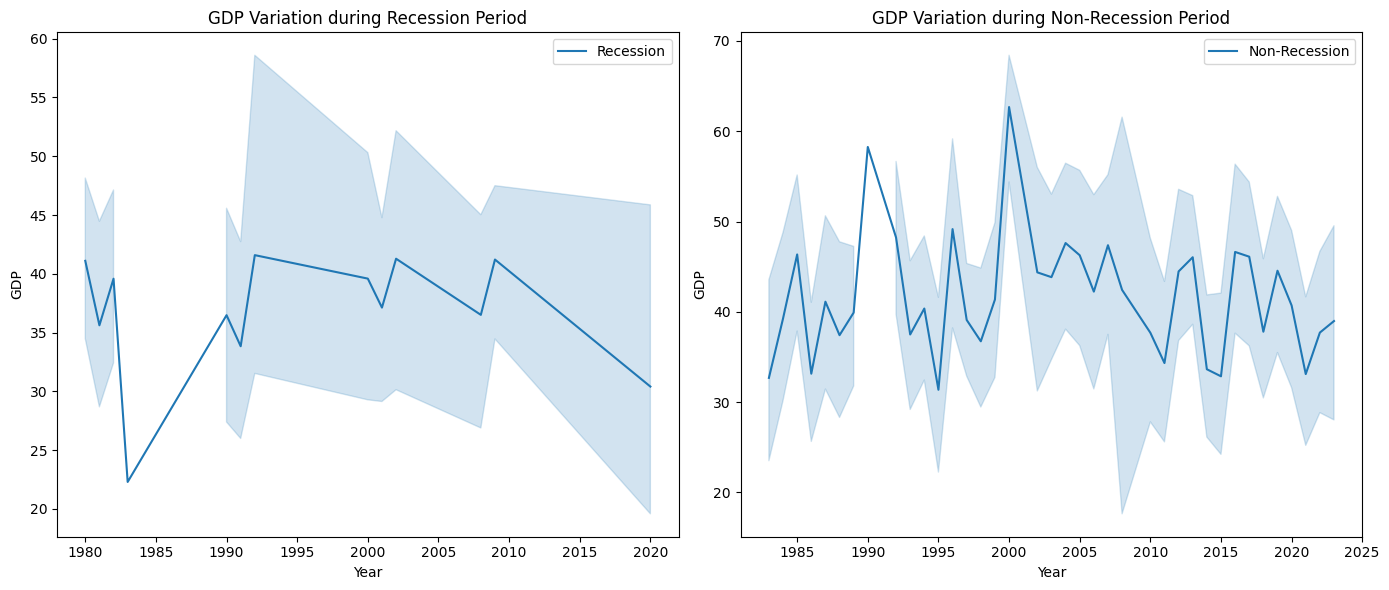

In [13]:
# Creating dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Recession Period')
ax1.legend()

# Plotting for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('GDP Variation during Non-Recession Period')
ax2.legend()

plt.tight_layout()
plt.show()


**7.** In the seventh figure, I developed a Bubble plot for displaying the impact of seasonality on Automobile Sales.
Displaying Automobile Sales for every month and using Seasonality Weight for representing the size of each bubble.

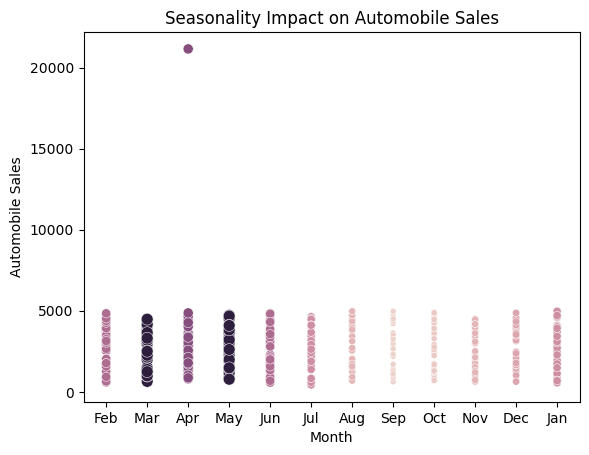

In [14]:
# Filtering data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Defining the size of bubbles based on seasonality weight
size = non_rec_data['Seasonality_Weight']

# Creating the Bubble plot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

**8.** In the eighth figure, I used the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relating it to the sales volume during recessions.
 I developed a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period. 


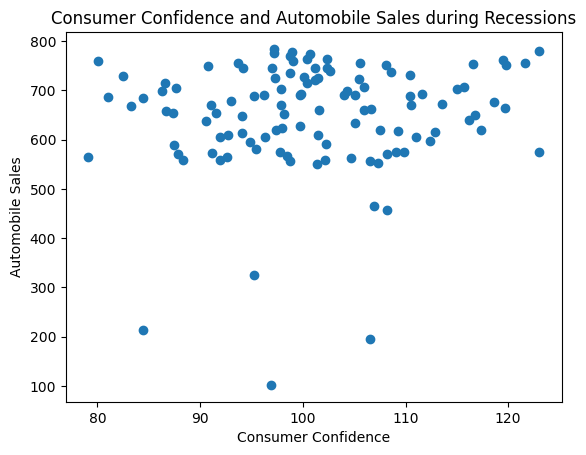

In [15]:
# Filtering data for recession periods
rec_data = df[df['Recession'] == 1]

# Creating the scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

**9.** In the nineth figure, I plotted another scatter plot and titled it as 'Relationship between Average Vehicle Price and Sales during Recessions'.

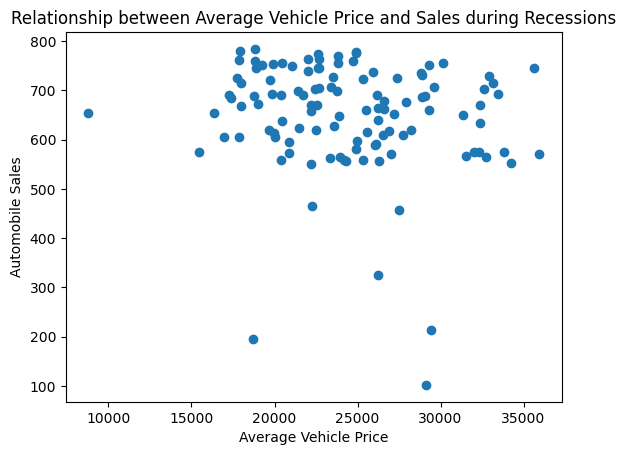

In [16]:
# Filtering data for recession periods
rec_data = df[df['Recession'] == 1]

# Creating the scatter plot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

**10.** In the tenth figure, I developed a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

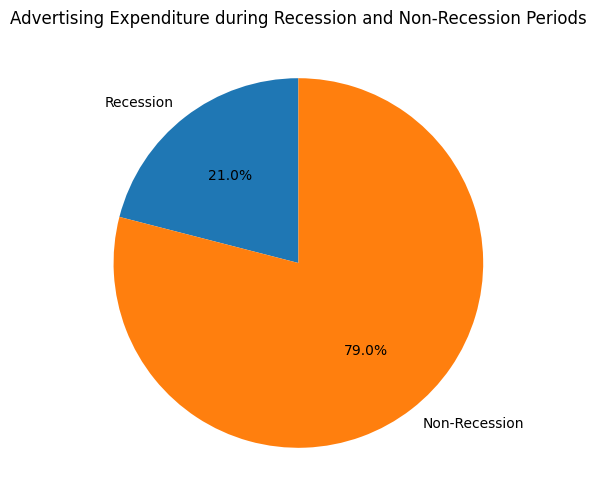

In [17]:
# Filtering the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculating the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Creating a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

**11.** In the eleventh figure, I developed another pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


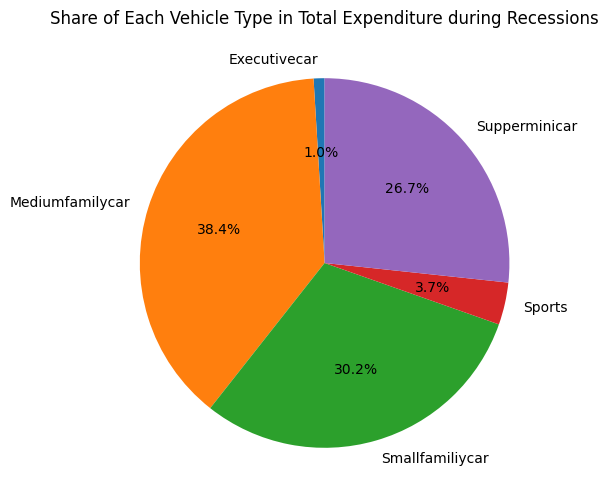

In [18]:
# Filtering the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculating the advertisement expenditure by vehicle type during recession
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Creating a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

 **12.** In the twelveth figure, I developed a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

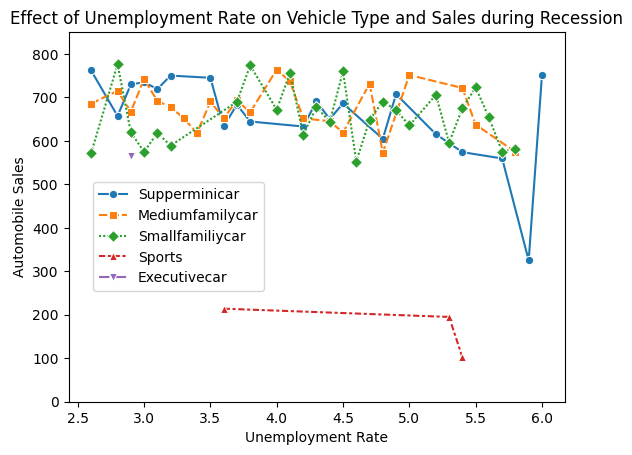

In [19]:
# Filtering out the data for recession period
df_rec = df[df['Recession'] == 1]

# Define a list of markers for different vehicle types
markers = ['o', 's', 'D', '^', 'v']  
# Creating a line plot to analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers=markers, err_style=None)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.ylim(0, 850)  # Adjust the y-axis limit if needed
plt.legend(loc=(0.05, .3))

plt.show()


**13.** In the thirteenth figure, I created an interactive choropleth map using `folium` to visualize automobile sales during recession periods across various cities in the United States. 

I generated sample economic data, including automobile sales and recession indicators, filtered the data to include only recession periods, aggregated automobile sales by city for these periods, downloaded and loaded a GeoJSON file with US state boundaries, created a `folium` map centered on the US and added a choropleth layer to visualize sales data, added tooltips to display state names on hover and then displayed the map, highlighting the distribution of automobile sales during recessions.

In [20]:
import json
from pyodide.http import pyfetch

# Sample data creation for demonstration
np.random.seed(0)
data = {
    'Year': np.random.choice(range(2000, 2021), 100),
    'Recession': np.random.choice([0, 1], 100),
    'Consumer_Confidence': np.random.rand(100),
    'Seasonality_Weight': np.random.rand(100),
    'Price': np.random.rand(100) * 10000,
    'Advertising_Expenditure': np.random.rand(100) * 1000,
    'Competition': np.random.rand(100) * 10,
    'GDP': np.random.rand(100) * 20000,
    'Growth_Rate': np.random.rand(100),
    'unemployment_rate': np.random.rand(100) * 10,
    'Automobile_Sales': np.random.rand(100) * 1000
}
df = pd.DataFrame(data)

# city data 
cities = ['New York', 'Los Angeles', 'Chicago', 'Texas', 'Philedelphia']
df['City'] = np.random.choice(cities, len(df))

print(df.head())

recession_data = df[df['Recession'] == 1]
 
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()
print(sales_by_city.head())

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

with open('us-states.json') as f:
    us_states = json.load(f)

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
 
choropleth = folium.Choropleth(
    geo_data=us_states,  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)
 
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Displaying the map
map1


   Year  Recession  Consumer_Confidence  Seasonality_Weight        Price  \
0  2012          0             0.881735            0.588317  8605.511738   
1  2015          0             0.692532            0.831048  7270.442627   
2  2000          0             0.725254            0.628982  2703.279052   
3  2003          0             0.501324            0.872651  1314.827993   
4  2003          1             0.956084            0.273542   553.743204   

   Advertising_Expenditure  Competition           GDP  Growth_Rate  \
0               115.484297     6.762425   7945.134943     0.349440   
1               618.480260     8.792348  19985.559878     0.781480   
2               974.256213     5.436781   7037.859924     0.751022   
3               990.345002     2.826997  14428.133359     0.927212   
4               409.054095     0.302353  12751.653891     0.028953   

   unemployment_rate  Automobile_Sales          City  
0           7.452330        757.364143       Chicago  
1           